# Linear roll motion analytical solution
As decribed by Journee, Peter Piel etc.

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sympy.physics.mechanics import dynamicsymbols

from rolldecay.symbols import *

from rolldecayestimators.substitute_dynamic_symbols import lambdify

from sympy.physics.vector.printing import vpprint, vlatex
from IPython.display import display, Math, Latex

In [2]:
delta = sp.symbols('delta')
y = dynamicsymbols('y')
y0 = dynamicsymbols('y0')
y0_dot = y0.diff()
y0_dotdot = y0_dot.diff()

D = sp.symbols('D')



## General Linear ordinary differential equation:

In [3]:
diff_eq = sp.Eq(y.diff().diff() + 2*delta*omega0*y.diff() + omega0**2*y,0)
Math(vlatex(diff_eq))

<IPython.core.display.Math object>

In [4]:
equation_D = sp.Eq(D,sp.sqrt(1-delta**2))
equation_D

Eq(D, sqrt(1 - delta**2))

In [5]:
lhs = y
rhs = sp.exp(-delta*omega0*t)*(y0*sp.cos(omega0*D*t) + (y0_dot/(omega0*D) + delta*y0/D)*sp.sin(omega0*D*t))

analytical_solution_general = sp.Eq(lhs,rhs)
Math(vlatex(analytical_solution_general))

<IPython.core.display.Math object>

In [6]:
phi_0 = dynamicsymbols('phi_0')
phi_0_dot = phi_0.diff()
phi_0_dotdot = phi_0_dot.diff()


subs = [
    (y,phi),
    (y0, phi_0),
    (y0_dot, phi_0_dot),
    (y0_dotdot, phi_0_dotdot),
    (D,sp.solve(equation_D,D)[0]),
    (delta, zeta),
]

analytical_solution = analytical_solution_general.subs(subs)
Math(vlatex(analytical_solution))

<IPython.core.display.Math object>

In [7]:
analytical_solution_lambda = lambdify(sp.solve(analytical_solution,phi)[0])

In [8]:
time = np.linspace(0,100,1000)
df = pd.DataFrame(index=time)
df['t']=time
df['zeta'] = 0.1
df['omega0'] = 0.5
df['phi_0'] = np.deg2rad(10)
df['phi_01d'] = 0

result = df.copy()
result['phi'] = analytical_solution_lambda(**df,)

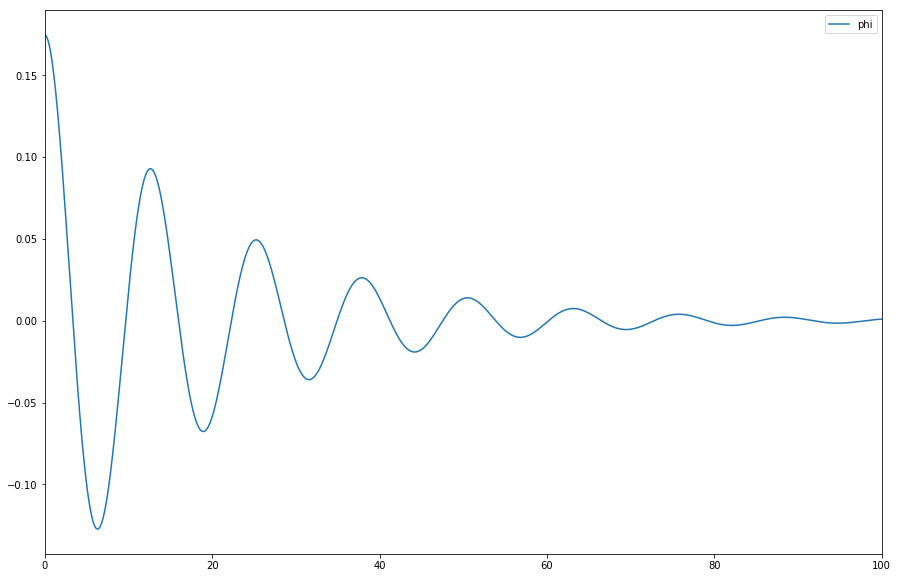

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
result.plot(y='phi', ax=ax)

In [10]:
from ipywidgets import interactive

In [11]:
time = np.linspace(0,100,300)
df = pd.DataFrame(index=time)
df['t']=time

In [18]:
def f(zeta=0.1,omega0=0.5,phi_0=10):
    fig,ax = plt.subplots()
    ax.set_xlim(0,time[-1])
    ax.set_ylim(-10,10)
    fig.set_size_inches(15,5)
    
    df['zeta'] = zeta
    df['omega0'] = omega0
    df['phi_0'] = np.deg2rad(phi_0)
    df['phi_01d'] = 0

    result = df.copy()
    result['phi'] = analytical_solution_lambda(**df,)
    result['phi']=np.rad2deg(result['phi'])
    ax.set_ylabel('Roll angle $\Phi$ [deg]')
    ax.set_xlabel('Time [s]')
    result.plot(y='phi', ax=ax)
    
    plt.show()

interactive_plot = interactive(f, zeta=(0.05,0.30, 0.01), omega0=(0.1,1,0.05), phi_0=(1.0,10.0,0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.1, description='zeta', max=0.3, min=0.05, step=0.01), FloatSlider(va…